<a href="https://colab.research.google.com/github/aswx12/MatteLab/blob/main/Mattelab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
github_url = 'https://github.com/aswx12/MatteLab/raw/refs/heads/main/Data_source.xlsx'

try:
    df = pd.read_excel(github_url)
    print("Loaded")
    display(df.head())
except Exception as e:
    print(f"Error: {e}")

Loaded


,Id,ethnicgp,gender,age,years,commit,satis,autonom,routine,attend,skill,prody,qual,absence,income
0,1,1,1,29.0,1.0,4.0,NaN,10,9,2,3,NaN,1,7.0,16.6
1,2,2,1,26.0,5.0,2.0,NaN,7,15,1,3,4.0,4,8.0,14.6
2,3,3,1,40.0,5.0,4.0,15.0,7,8,1,4,3.0,4,0.0,17.8
3,4,3,1,46.0,15.0,2.0,7.0,7,10,2,3,3.0,4,4.0,16.4
4,5,2,2,63.0,36.0,4.0,14.0,11,18,1,3,5.0,3,0.0,18.6


EXERCISE 1.1

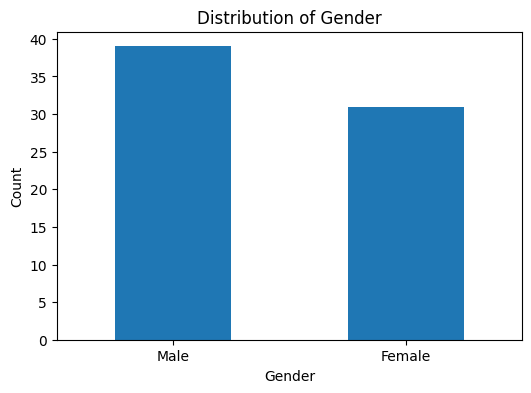

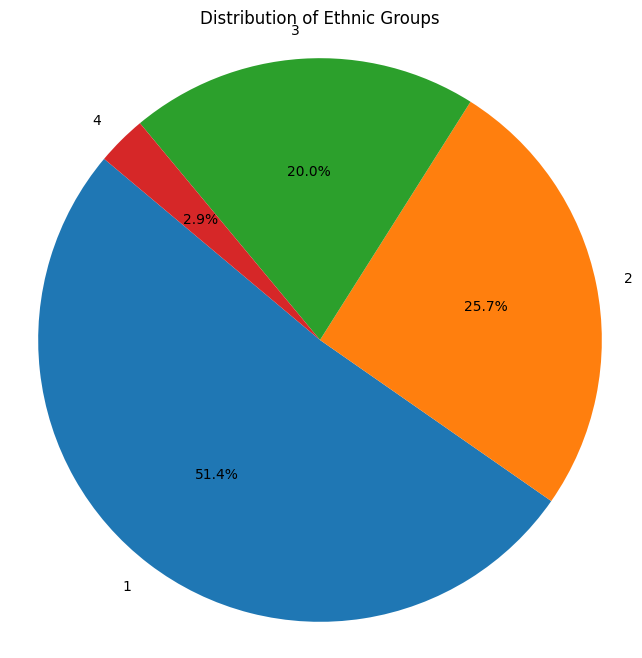

In [ ]:
# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Create a bar chart for gender
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.show()

# Count the occurrences of each ethnic group
ethnic_counts = df['ethnicgp'].value_counts()

# Create a pie chart for ethnic groups
plt.figure(figsize=(8, 8))
plt.pie(ethnic_counts, labels=ethnic_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ethnic Groups')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
test1